# PCA

In [2]:
library(FactoMineR)
library(factoextra)#fviz_eig
library(psych)

library(ggplot2)
library(corrplot)
library(RColorBrewer)

library(tidyverse)
library(reshape)#melt
library(nFactors)#optimal number of components

## USA-optimal dimensions
plotnScree:https://rdrr.io/cran/nFactors/src/R/plotnScree.R

In [3]:
plotnScree <-
function (nScree,
          elbow = 3,
          legend = TRUE,
          ylab   = "Eigenvalues",
          xlab   = "Components",
          main   = "Non Graphical Solutions to Scree Test")
          {
   if (!inherits(nScree, "nScree"))  stop("Method is only for nScree objects")
   if (nScree$Model == "components") nkaiser = "Eigenvalues (>mean  = " else nkaiser = "Eigenvalues (>0 = "
   if (nScree$Model == "factors")  xlab   = "Factors"
   par(col   = 1, pch = 1)     # Color and symbol for usual scree
   par(mfrow = c(1,1),lwd=2)
   eig        <- nScree$Analysis$Eigenvalues
   k          <- 1:length(eig)
   #plotuScree(x=eig, ...)                                                                   # To develop
   plotuScree(x=eig, main=main, xlab=xlab, ylab=ylab)
   nk         <- length(eig)
   noc        <- nScree$Components$noc
   vp.p       <- lm(eig[c(noc+1,nk)] ~ k[c(noc+1,nk)])
   x          <- sum(c(1,1) * coef(vp.p))
   y          <- sum(c(1,nk)* coef(vp.p))
   par(col = 10)            # Color for optimal coordinates
   lines(k[c(1,nk)],c(x,y),lwd=1.8)
   par(col = 11,pch=2)            # Color and symbol for parallel analysis
   lines(1:nk, nScree$Analysis$Par.Analysis, type = "b",lwd=1.8)
   if (legend == TRUE) {
     leg.txt  <- c(paste("Parallel Analysis (n = ",nScree$Components$nparallel,")"),
                 c(paste("Kaiser-Guttman rule (n = ",nScree$Components$nkaiser,")")),
                 c(paste("Cattell’s scree test (n = ",elbow,")")),
                 c(paste("Optimal Coordinates (n = ",nScree$Components$noc,")")) )
     legend("topright",
            legend   = leg.txt,
            pch      = c('△','_','○','_'),
            text.col = c(3,4,1,2), 
            col = c(3,4,1,2),
            cex = 1.3)
     }
   naf        <-   nScree$Components$naf
   text(x = noc ,    y = eig[noc],     label = " (OC)", cex = 1, adj = c(0,0), col = 2)
   }

In [4]:
# import relationship dimension ratings scaled from the Data cleaning's output
dim_rel_scaled = read.csv('./input_data/usa_GT_dim_rel_scaled_33d.csv', row.names=1,encoding='UTF-8')

# Parallel analysis, Optimal Coordinates, and  Cattell's Scree Test
ev <- eigen(cor(dim_rel_scaled)) # get eigenvalues
ap <- parallel(subject=nrow(dim_rel_scaled),var=ncol(dim_rel_scaled),model="components",rep=5000,cent=.05) 
nS <- nScree(x=ev$values, model = "components",aparallel=ap$eigen$qevpea) # "qevpea" indicate 95 centile given cent=.05 

In [5]:
nS$Analysis$Cumu[1:5]

[1] 0.3639674 0.5668920 0.6485449 0.7038657 0.7417733

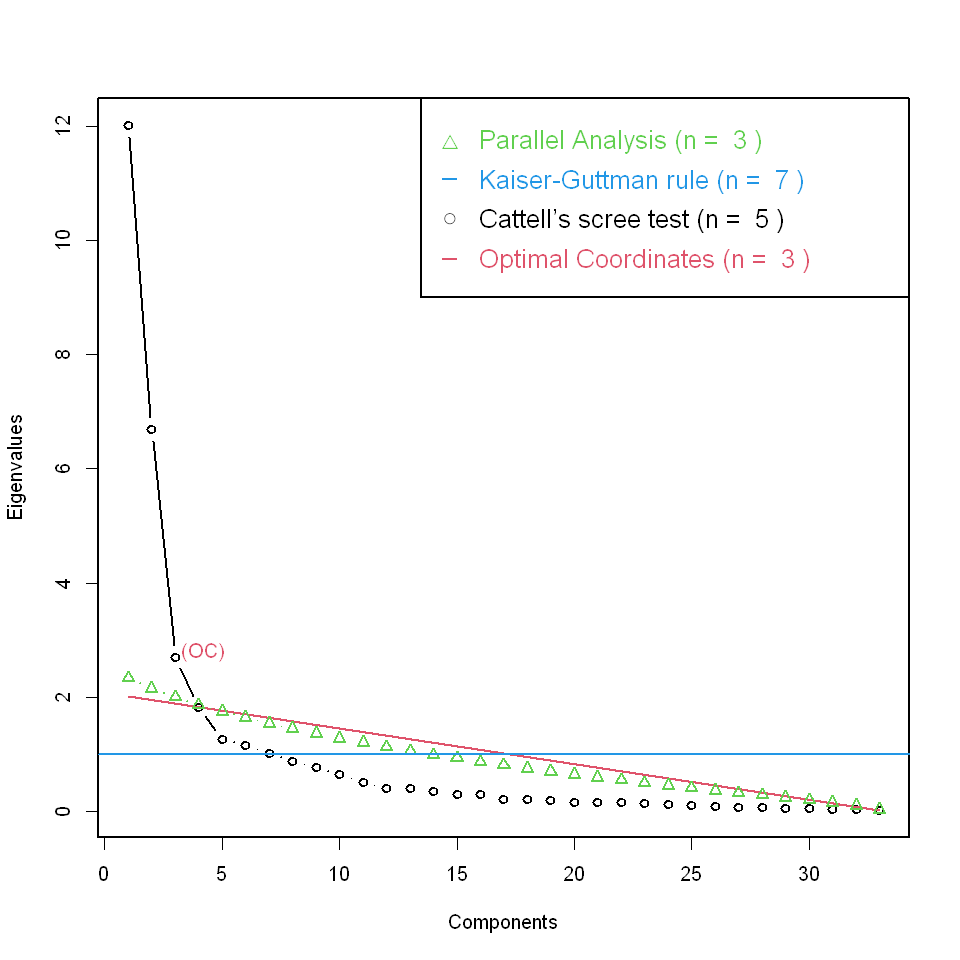

In [6]:
options(repr.plot.width=8,repr.plot.height=8)
plotnScree(nS, elbow = 5,legend=TRUE, main = NULL)
abline(h = 1, col=4, lty=1,lwd =1.8) # Kaiser-Guttman Rule

## USA-loading score

In [7]:
dim_rel.pca = prcomp(dim_rel_scaled)
ncomp = 5

loadings_none = dim_rel.pca$rotation[,1:ncomp]%*% diag(dim_rel.pca$sdev,ncomp,ncomp)
scores_none = dim_rel.pca$x[,1:ncomp] 

loadings_var = varimax(loadings_none)$loadings
scores_var = scale(scores_none) %*% varimax(loadings_none)$rotmat
loadings_var

write.csv(loadings_var,'./output_data/usa_GTall_loadings_var.csv')
write.csv(scores_var,'./output_data/usa_GTall_scores_var.csv')


Loadings:
                           [,1]   [,2]   [,3]   [,4]   [,5]  
Valence.Evaluation          0.162 -0.840  0.144 -0.219 -0.135
Equality                    0.235         0.683  0.189  0.113
Activity.Intensity          0.603 -0.317         0.367 -0.370
Socioemotional              0.890 -0.198  0.271  0.157       
Formality.and.Regulation   -0.849 -0.120 -0.265              
Intimacy                    0.921         0.117        -0.190
Visibility                 -0.605 -0.173         0.323       
Communal.Sharing            0.790 -0.294  0.298  0.203 -0.119
Expected.Reciprocity       -0.549               -0.176       
Strategic                  -0.878  0.129 -0.211 -0.205       
Concreteness               -0.805        -0.173 -0.398       
Uniqueness                  0.635 -0.197 -0.406  0.215 -0.142
Love.Expression             0.823 -0.300         0.194 -0.224
Information.Exchange              -0.638 -0.454        -0.358
Money.Exchange             -0.414        -0.260 -0.777     

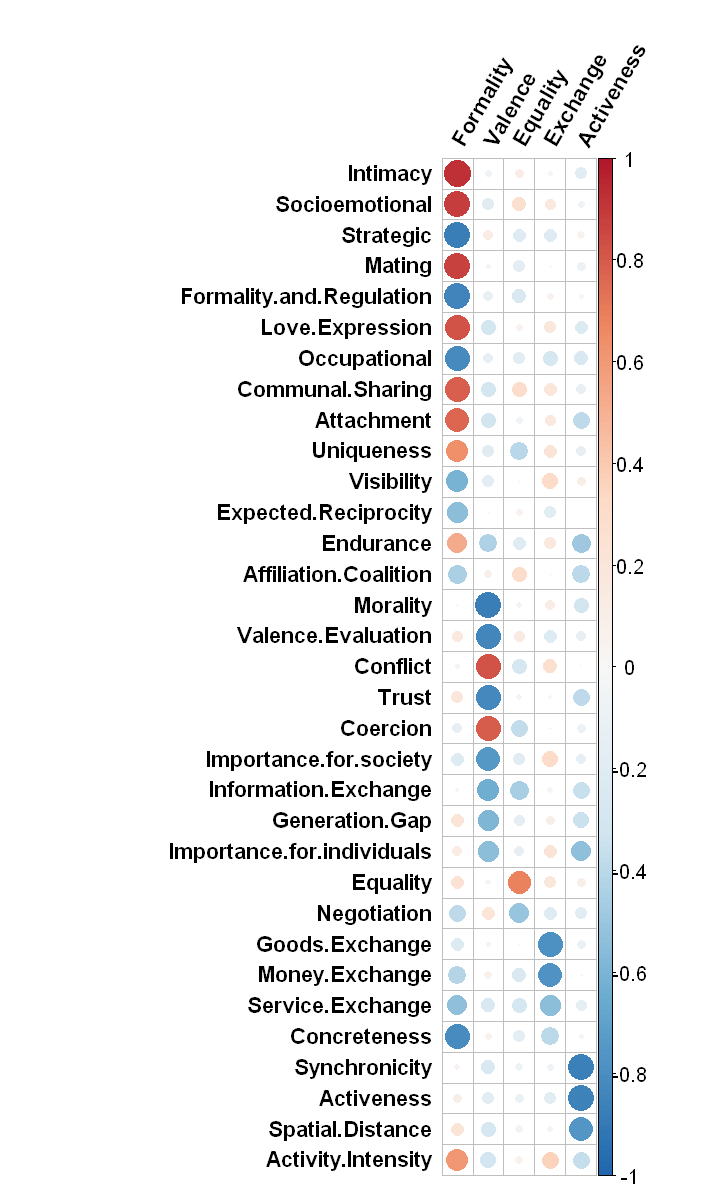

In [8]:
loadings_var_reorder = as.data.frame(loadings_var[,1:ncomp])
colnames(loadings_var_reorder) = c('Formality','Valence','Equality','Exchange','Activeness')

#filter each row's max loading, and attribute it to correspnding column.
order_list = c()
for (row in c(1:33)){
    temp_max = abs(loadings_var_reorder[row,1])
    n = 1
    # change items in dimention manually!!
    if (rownames(loadings_var_reorder)[row] == 'Activity.Intensity') {
        n = 5
    } 
    else if (rownames(loadings_var_reorder)[row] == 'Activeness') {
        n = 5
    }
    else if (rownames(loadings_var_reorder)[row] == 'Concreteness') {
        n = 4

    } else {
    for (col in c(2:5)){
        temp = abs(loadings_var_reorder[row,col])
        if (temp > temp_max){
            temp_max = temp
            n = col
        }
       } 
    }
    order_list[row] = n
}
loadings_var_reorder = loadings_var_reorder %>% mutate(order = order_list)
    
RC1 = loadings_var_reorder %>% filter(order==1) %>% arrange(desc(abs(Formality)))
RC2 = loadings_var_reorder %>% filter(order==2) %>% arrange(desc(abs(Valence)))
RC3 = loadings_var_reorder %>% filter(order==3) %>% arrange(desc(abs(Equality)))
RC4 = loadings_var_reorder %>% filter(order==4) %>% arrange(desc(abs(Exchange)))
RC5 = loadings_var_reorder %>% filter(order==5) %>% arrange(desc(abs(Activeness)))

loadings_var_reorder = rbind(RC1,RC2,RC3,RC4,RC5)
loadings_var_reorder = loadings_var_reorder[1:5]

options(repr.plot.width=6, repr.plot.height=10)
my.breaks = c(seq(-1,1,by=0.01))
corrplot(as.matrix(loadings_var_reorder),is.corr=FALSE,
         tl.col = "black",tl.srt=60,tl.cex=1.1,family='sans',font=2,
         col.lim = c(-1,1), cl.ratio = 0.4, cl.cex=1, 
         col = colorRampPalette(rev(brewer.pal(n=7,name ="RdBu")))(length(my.breaks)))

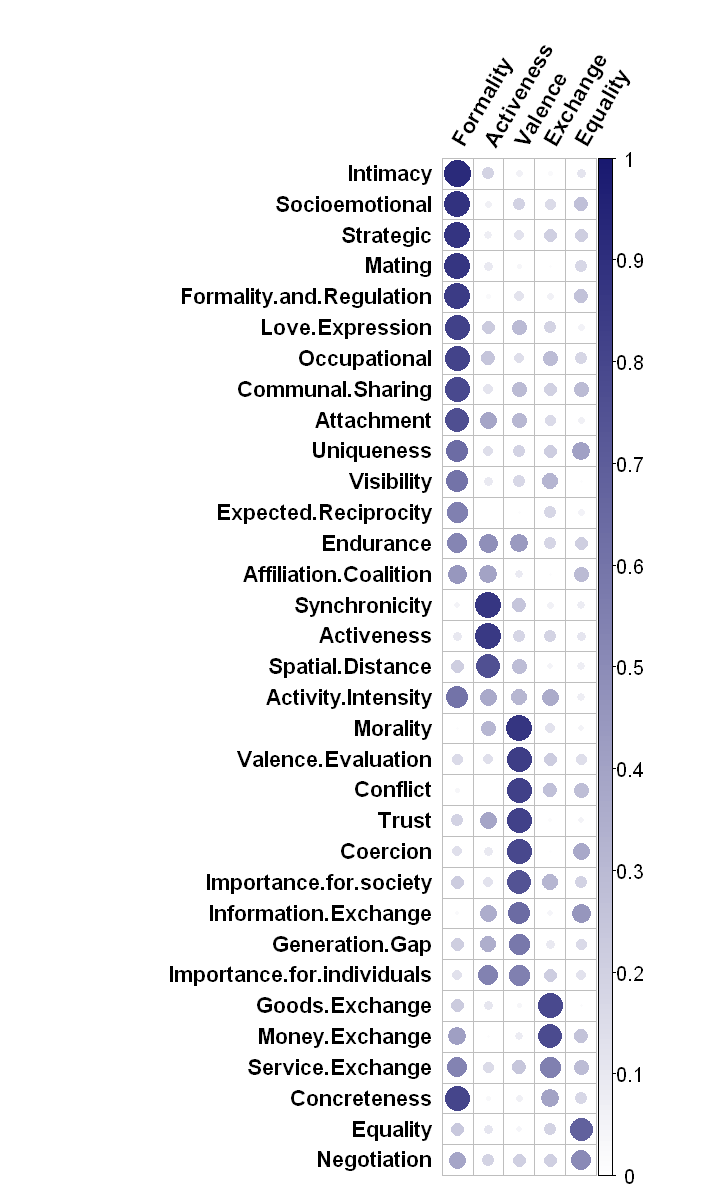

In [9]:
# tailored
loadings_var_reorder = as.data.frame(loadings_var[,1:ncomp])
colnames(loadings_var_reorder) = c('Formality','Valence','Equality','Exchange','Activeness')

#filter each row's max loading, and attribute it to correspnding column.
order_list = c()
for (row in c(1:33))
{
    temp_max = abs(loadings_var_reorder[row,1])
    n = 1
    # change items in dimention manually!!
    if (rownames(loadings_var_reorder)[row] == 'Activity.Intensity') {
        n = 5
    } 
    else if (rownames(loadings_var_reorder)[row] == 'Activeness') {
        n = 5
    }
    else if (rownames(loadings_var_reorder)[row] == 'Concreteness') {
        n = 4

    } else {
    for (col in c(2:5)){
        temp = abs(loadings_var_reorder[row,col])
        if (temp > temp_max){
            temp_max = temp
            n = col
            }
        }
    }
    order_list[row] = n
}

loadings_var_reorder = loadings_var_reorder %>% mutate(order = order_list)
loadings_var_reorder = loadings_var_reorder %>%
  mutate(
    Exchange = abs(Exchange),
    Activeness = abs(Activeness),
    Equality = abs(Equality),
    Formality = abs(Formality),
    Valence = abs(Valence)
    )

RC1 = loadings_var_reorder %>% filter(order==1) %>% arrange(desc(Formality))
RC2 = loadings_var_reorder %>% filter(order==5) %>% arrange(desc(Activeness))
RC3 = loadings_var_reorder %>% filter(order==2) %>% arrange(desc(Valence))
RC4 = loadings_var_reorder %>% filter(order==4) %>% arrange(desc(Exchange))
RC5 = loadings_var_reorder %>% filter(order==3) %>% arrange(desc(Equality))

loadings_var_reorder = rbind(RC1,RC2,RC3,RC4,RC5)
loadings_var_reorder[,c('Formality','Valence','Equality','Exchange','Activeness')] <- loadings_var_reorder[,c('Formality','Activeness','Valence','Exchange','Equality')]
colnames(loadings_var_reorder) = c('Formality','Activeness','Valence','Exchange','Equality')

loadings_var_reorder = loadings_var_reorder[1:5]

options(repr.plot.width=6, repr.plot.height=10)
my.breaks = c(seq(-1,1,by=0.01))
corrplot(as.matrix(loadings_var_reorder),is.corr=FALSE,
         tl.col = "black",tl.srt=60,tl.cex=1.1,family='sans',font=2,
         col.lim = c(0,1),cl.ratio = 0.4,cl.cex=1,
         col = colorRampPalette(c("white","midnightblue"))(length(my.breaks)))

In [9]:
namepure <- gsub("\\.", " ", rownames(loadings_var_reorder))
names <- paste(namepure, collapse = "\n")
cat(names)

Intimacy
Socioemotional
Strategic
Mating
Formality and Regulation
Love Expression
Occupational
Communal Sharing
Attachment
Uniqueness
Visibility
Expected Reciprocity
Endurance
Affiliation Coalition
Morality
Valence Evaluation
Conflict
Trust
Coercion
Importance for society
Information Exchange
Generation Gap
Importance for individuals
Equality
Negotiation
Goods Exchange
Money Exchange
Service Exchange
Concreteness
Synchronicity
Activeness
Spatial Distance
Activity Intensity

## CHN-optimal dimensions
plotnScree:https://rdrr.io/cran/nFactors/src/R/plotnScree.R

In [10]:
plotnScree <-
function (nScree,
          elbow = 3,
          legend = TRUE,
          ylab   = "Eigenvalues",
          xlab   = "Components",
          main   = "Non Graphical Solutions to Scree Test")
          {
   if (!inherits(nScree, "nScree"))  stop("Method is only for nScree objects")
   if (nScree$Model == "components") nkaiser = "Eigenvalues (>mean  = " else nkaiser = "Eigenvalues (>0 = "
   if (nScree$Model == "factors")  xlab   = "Factors"
   par(col   = 1, pch = 1)     # Color and symbol for usual scree
   par(mfrow = c(1,1),lwd=2)
   eig        <- nScree$Analysis$Eigenvalues
   k          <- 1:length(eig)
   #plotuScree(x=eig, ...)                                                                   # To develop
   plotuScree(x=eig, main=main, xlab=xlab, ylab=ylab)
   nk         <- length(eig)
   noc        <- nScree$Components$noc
   vp.p       <- lm(eig[c(noc+1,nk)] ~ k[c(noc+1,nk)])
   x          <- sum(c(1,1) * coef(vp.p))
   y          <- sum(c(1,nk)* coef(vp.p))
   par(col = 10)            # Color for optimal coordinates
   lines(k[c(1,nk)],c(x,y),lwd=1.8)
   par(col = 11,pch=2)            # Color and symbol for parallel analysis
   lines(1:nk, nScree$Analysis$Par.Analysis, type = "b",lwd=1.8)
   if (legend == TRUE) {
     leg.txt  <- c(paste("Parallel Analysis (n = ",nScree$Components$nparallel,")"),
                 c(paste("Kaiser-Guttman rule (n = ",nScree$Components$nkaiser,")")),
                 c(paste("Cattell’s scree test (n = ",elbow,")")),
                 c(paste("Optimal Coordinates (n = ",nScree$Components$noc,")")) )
     legend("topright",
            legend   = leg.txt,
            pch      = c('△','_','○','_'),
            text.col = c(3,4,1,2), 
            col = c(3,4,1,2),
            cex = 1.3)
     }
   naf        <-   nScree$Components$naf
   text(x = noc ,    y = eig[noc],     label = " (OC)", cex = 1, adj = c(0,0), col = 2)
   }

In [11]:
# import relationship dimension ratings scaled from the Data cleaning's output
dim_rel_scaled = read.csv('./input_data/chn_GT_dim_rel_scaled_33d_all.csv', row.names=1,encoding='UTF-8')

# Parallel analysis, Optimal Coordinates, and  Cattell's Scree Test
ev <- eigen(cor(dim_rel_scaled)) # get eigenvalues
ap <- parallel(subject=nrow(dim_rel_scaled),var=ncol(dim_rel_scaled),model="components",rep=5000,cent=.05) 
nS <- nScree(x=ev$values, model = "components",aparallel=ap$eigen$qevpea) # "qevpea" indicate 95 centile given cent=.05 

In [12]:
nS$Analysis$Cumu[1:5]

[1] 0.4665668 0.6717012 0.7387183 0.8005070 0.8385281

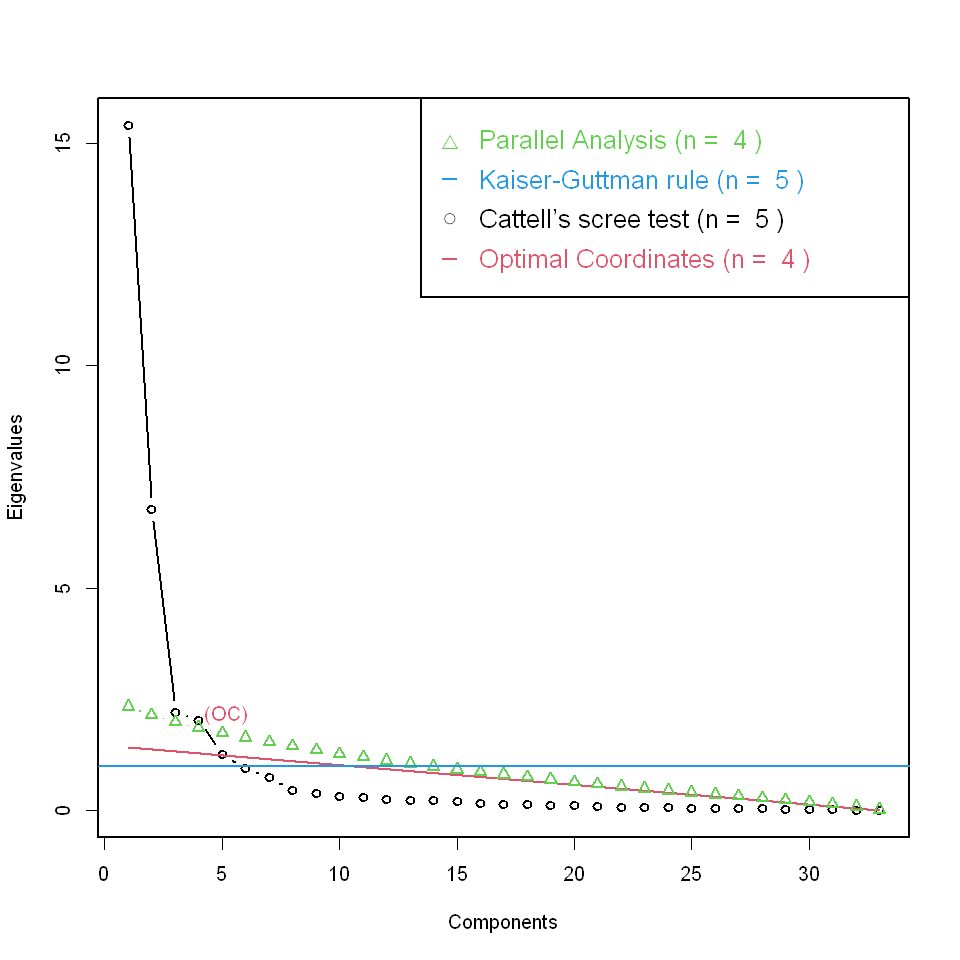

In [13]:
options(repr.plot.width=8,repr.plot.height=8)
plotnScree(nS, elbow = 5,legend=TRUE, main = NULL)
abline(h = 1, col=4, lty=1,lwd =1.8) # Kaiser-Guttman Rule

## CHN-loading score

In [14]:
dim_rel.pca = prcomp(dim_rel_scaled)
ncomp = 5

loadings_none = dim_rel.pca$rotation[,1:ncomp]%*% diag(dim_rel.pca$sdev,ncomp,ncomp)
scores_none = dim_rel.pca$x[,1:ncomp] 

loadings_var = varimax(loadings_none)$loadings
scores_var = scale(scores_none) %*% varimax(loadings_none)$rotmat
loadings_var

write.csv(loadings_var,'./output_data/chn_GTall_loadings_var_all.csv')
write.csv(scores_var,'./output_data/chn_GTall_scores_var_all.csv')


Loadings:
                           [,1]   [,2]   [,3]   [,4]   [,5]  
Valence.Evaluation          0.133 -0.281                0.922
Equality                    0.229         0.912         0.156
Activity.Intensity          0.682 -0.589 -0.142         0.237
Socioemotional              0.871         0.143 -0.323  0.167
Formality.and.Regulation   -0.608 -0.188         0.712       
Intimacy                    0.756 -0.389        -0.182  0.446
Visibility                 -0.347  0.224         0.842  0.133
Communal.Sharing            0.896 -0.205                0.251
Expected.Reciprocity       -0.854         0.107              
Strategic                  -0.857                0.213 -0.367
Concreteness               -0.844                      -0.107
Uniqueness                  0.704 -0.430        -0.410       
Love.Expression             0.834 -0.197  0.104 -0.141  0.325
Information.Exchange              -0.763         0.330  0.393
Money.Exchange             -0.909               -0.153 -0.1

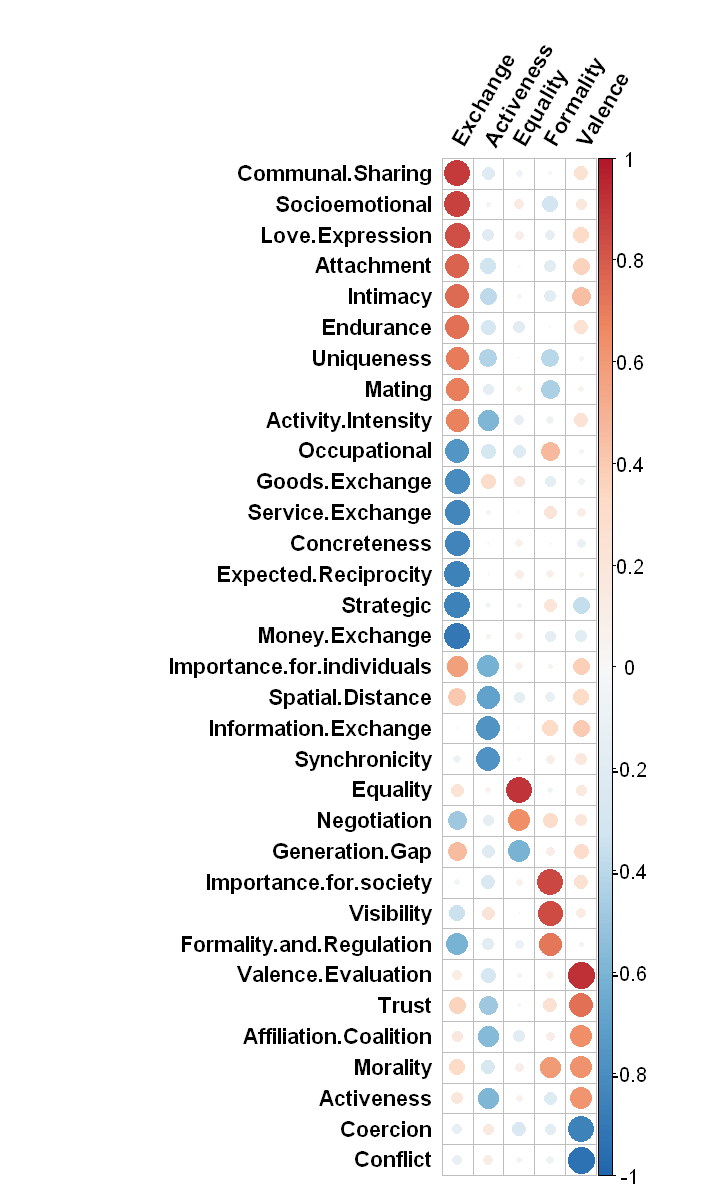

In [15]:
loadings_var_reorder = as.data.frame(loadings_var[,1:ncomp])
colnames(loadings_var_reorder) = c('Exchange','Activeness','Equality','Formality','Valence')

#filter each row's max loading, and attribute it to correspnding column.
order_list = c()
for (row in c(1:33)){
    temp_max = abs(loadings_var_reorder[row,1])
    n = 1
    for (col in c(2:5)){
        temp = abs(loadings_var_reorder[row,col])
        if (temp > temp_max){
            temp_max = temp
            n = col
        }
        
    }
    order_list[row] = n
}
loadings_var_reorder = loadings_var_reorder %>% mutate(order = order_list)
RC1 = loadings_var_reorder %>% filter(order==1) %>% arrange(desc(Exchange))
RC2 = loadings_var_reorder %>% filter(order==2) %>% arrange(desc(Activeness))
RC3 = loadings_var_reorder %>% filter(order==3) %>% arrange(desc(Equality))
RC4 = loadings_var_reorder %>% filter(order==4) %>% arrange(desc(Formality))
RC5 = loadings_var_reorder %>% filter(order==5) %>% arrange(desc(Valence))

loadings_var_reorder = rbind(RC1,RC2,RC3,RC4,RC5)
loadings_var_reorder = loadings_var_reorder[1:5]

options(repr.plot.width=6, repr.plot.height=10)
my.breaks = c(seq(-1,1,by=0.01))
corrplot(as.matrix(loadings_var_reorder),is.corr=FALSE,
         tl.col = "black",tl.srt=60,tl.cex=1.1,family='sans',font=2,
         col.lim = c(-1,1),cl.ratio = 0.4,cl.cex=1,
         col = colorRampPalette(rev(brewer.pal(n=7,name ="RdBu")))(length(my.breaks)))

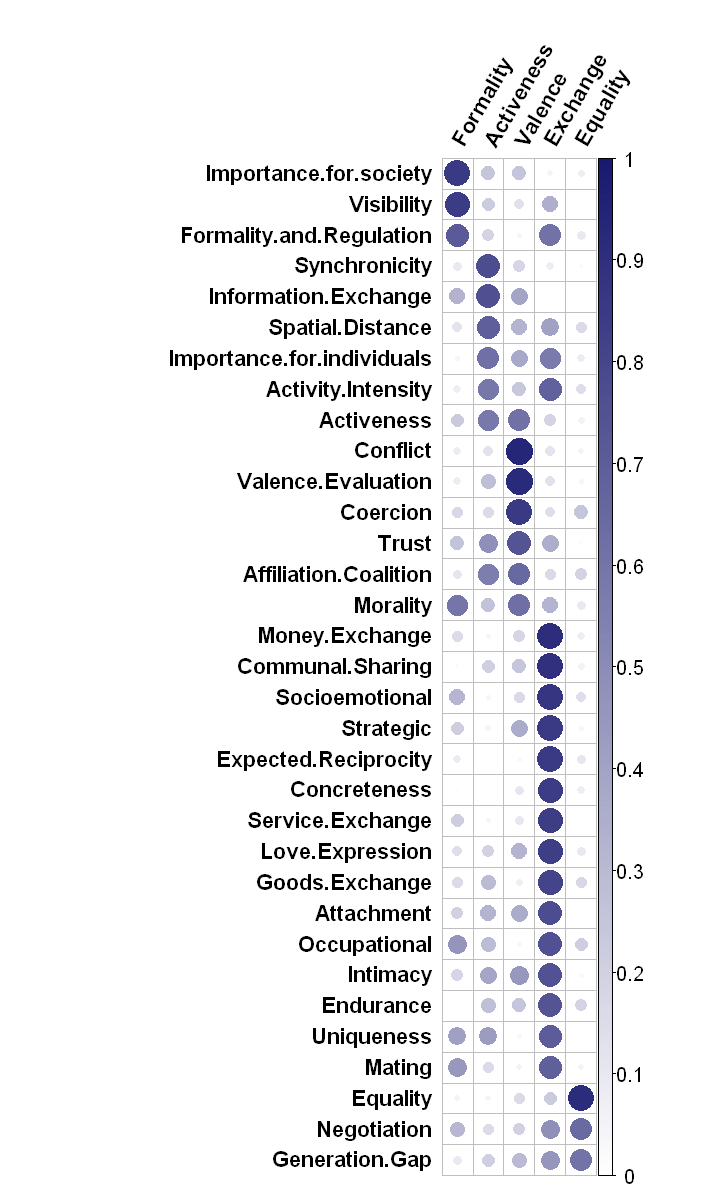

In [16]:
# tailored
loadings_var_reorder = as.data.frame(loadings_var[,1:ncomp])
colnames(loadings_var_reorder) = c('Exchange','Activeness','Equality','Formality','Valence')

#filter each row's max loading, and attribute it to correspnding column.
order_list = c()
for (row in c(1:33)){
    temp_max = abs(loadings_var_reorder[row,1])
    n = 1
    # change items in dimention manually!!
    if (rownames(loadings_var_reorder)[row] == 'Activity.Intensity') {
        n = 2
    } 
    else if (rownames(loadings_var_reorder)[row] == 'Activeness') {
        n = 2
    } else {
        for (col in c(2:5)){
            temp = abs(loadings_var_reorder[row,col])
            if (temp > temp_max){
                temp_max = temp
                n = col
            }
        }
        
    }
    order_list[row] = n
}
loadings_var_reorder = loadings_var_reorder %>% mutate(order = order_list)
loadings_var_reorder = loadings_var_reorder %>%
  mutate(
    Exchange = abs(Exchange),
    Activeness = abs(Activeness),
    Equality = abs(Equality),
    Formality = abs(Formality),
    Valence = abs(Valence)
  )

RC1 = loadings_var_reorder %>% filter(order==4) %>% arrange(desc(Formality))
RC2 = loadings_var_reorder %>% filter(order==2) %>% arrange(desc(Activeness))
RC3 = loadings_var_reorder %>% filter(order==5) %>% arrange(desc(Valence))
RC4 = loadings_var_reorder %>% filter(order==1) %>% arrange(desc(Exchange))
RC5 = loadings_var_reorder %>% filter(order==3) %>% arrange(desc(Equality))

loadings_var_reorder = rbind(RC1,RC2,RC3,RC4,RC5)
loadings_var_reorder[,c('Exchange','Activeness','Equality','Formality','Valence')] <- loadings_var_reorder[,c('Formality','Activeness','Valence','Exchange','Equality')]
colnames(loadings_var_reorder) = c('Formality','Activeness','Valence','Exchange','Equality')

loadings_var_reorder = loadings_var_reorder[1:5]

options(repr.plot.width=6, repr.plot.height=10)
my.breaks = c(seq(-1,1,by=0.01))
corrplot(as.matrix(loadings_var_reorder),is.corr=FALSE,
         tl.col = "black",tl.srt=60,tl.cex=1.1,family='sans',font=2,
         col.lim = c(0,1),cl.ratio = 0.4,cl.cex=1,
         col= colorRampPalette(c("white","midnightblue"))(length(my.breaks)))
#          col = colorRampPalette(rev(brewer.pal(n=7,name ="RdBu")))(length(my.breaks)))

In [17]:
namepure <- gsub("\\.", " ", rownames(loadings_var_reorder))
names <- paste(namepure, collapse = "\n")
cat(names)

Importance for society
Visibility
Formality and Regulation
Synchronicity
Information Exchange
Spatial Distance
Importance for individuals
Activity Intensity
Activeness
Conflict
Valence Evaluation
Coercion
Trust
Affiliation Coalition
Morality
Money Exchange
Communal Sharing
Socioemotional
Strategic
Expected Reciprocity
Concreteness
Service Exchange
Love Expression
Goods Exchange
Attachment
Occupational
Intimacy
Endurance
Uniqueness
Mating
Equality
Negotiation
Generation Gap